# Project

i will be working with the transactions, product, and demographic tables in this project.

* First, read in the transactions data.

* Reading in the only columns `household_key`, `BASKET_ID`, `STORE_ID`, `DAY`, `QUANTITY`, and `SALES_VALUE`.

* Converting `DAY`, `QUANTITY`, and `STORE_ID` to the smallest appropriate integer types.


In [20]:
import pandas as pd
import numpy as np
import seaborn as sns
import itertools

import matplotlib.pyplot as plt
import matplotlib.mlab as mlab
import matplotlib
plt.style.use('seaborn-bright')
from matplotlib.pyplot import figure

%matplotlib inline
matplotlib.rcParams['figure.figsize'] = (12,8)

In [24]:
from matplotlib import style
  
print(plt.style.available)

['bmh', 'classic', 'dark_background', 'fast', 'fivethirtyeight', 'ggplot', 'grayscale', 'seaborn-bright', 'seaborn-colorblind', 'seaborn-dark-palette', 'seaborn-dark', 'seaborn-darkgrid', 'seaborn-deep', 'seaborn-muted', 'seaborn-notebook', 'seaborn-paper', 'seaborn-pastel', 'seaborn-poster', 'seaborn-talk', 'seaborn-ticks', 'seaborn-white', 'seaborn-whitegrid', 'seaborn', 'Solarize_Light2', 'tableau-colorblind10', '_classic_test']


In [27]:
path = "../project_data/project_transactions.csv"

cols = ["household_key", "BASKET_ID", "DAY", "PRODUCT_ID", "QUANTITY", "SALES_VALUE"]

dtypes = {"DAY": "Int16", "QUANTITY": "Int32", "STORE_ID": "Int32"}

transactions = pd.read_csv(path,
                          dtype=dtypes,
                          usecols=cols)

In [3]:
transactions.info(memory_usage="deep")

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2146311 entries, 0 to 2146310
Data columns (total 6 columns):
 #   Column         Dtype  
---  ------         -----  
 0   household_key  int64  
 1   BASKET_ID      int64  
 2   DAY            Int16  
 3   PRODUCT_ID     int64  
 4   QUANTITY       Int32  
 5   SALES_VALUE    float64
dtypes: Int16(1), Int32(1), float64(1), int64(3)
memory usage: 81.9 MB


In [28]:
transactions.isna().sum()

household_key    0
BASKET_ID        0
DAY              0
PRODUCT_ID       0
QUANTITY         0
SALES_VALUE      0
dtype: int64

In [29]:
#creating a Date Column.

transactions = (transactions
                .assign(date = 
                        (pd.to_datetime("2016", format='%Y') 
                        + pd.to_timedelta(transactions["DAY"].sub(1).astype(str) + " days"))
                       )
                .drop(["DAY"], axis=1)
               )

In [5]:
transactions.head()

,household_key,BASKET_ID,PRODUCT_ID,QUANTITY,SALES_VALUE,date
0,1364,26984896261,842930,1,2.19,2016-01-01
1,1364,26984896261,897044,1,2.99,2016-01-01
2,1364,26984896261,920955,1,3.09,2016-01-01
3,1364,26984896261,937406,1,2.50,2016-01-01
4,1364,26984896261,981760,1,0.60,2016-01-01


## TIME BASED ANALYSIS



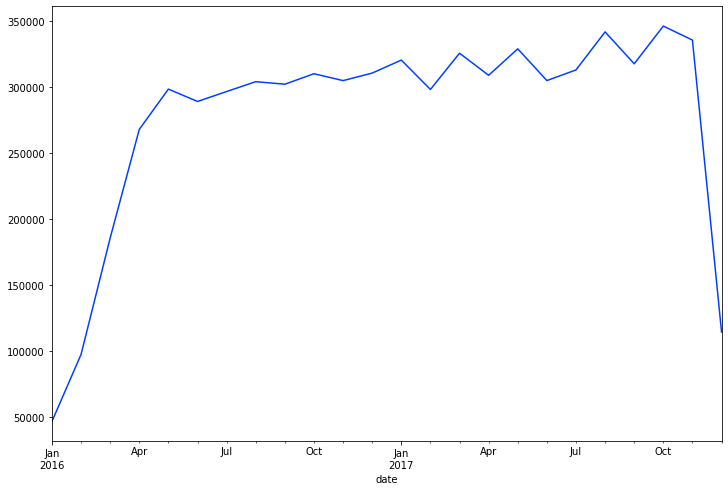

In [31]:
#setting time as an index
(transactions.set_index("date")
 .loc[:, "SALES_VALUE"]
 .resample("M")
 .sum()
 .plot());

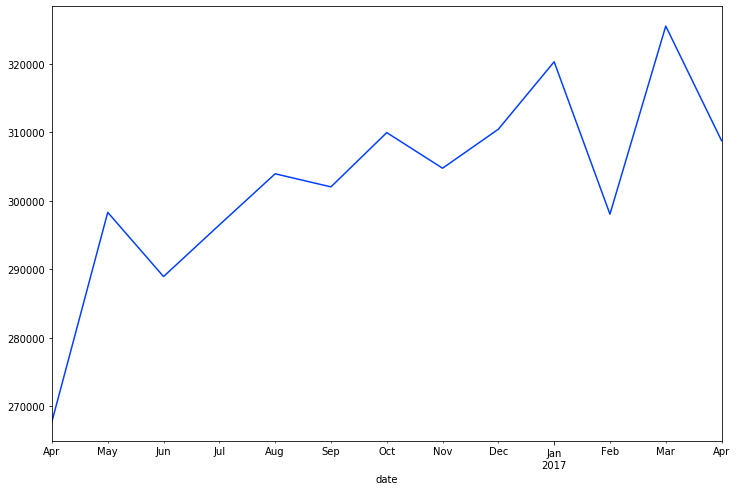

In [40]:
(transactions.set_index("date")
.loc["2016-04":"2017-04","SALES_VALUE"]
 .resample("M")
 .sum()
 .plot()
);

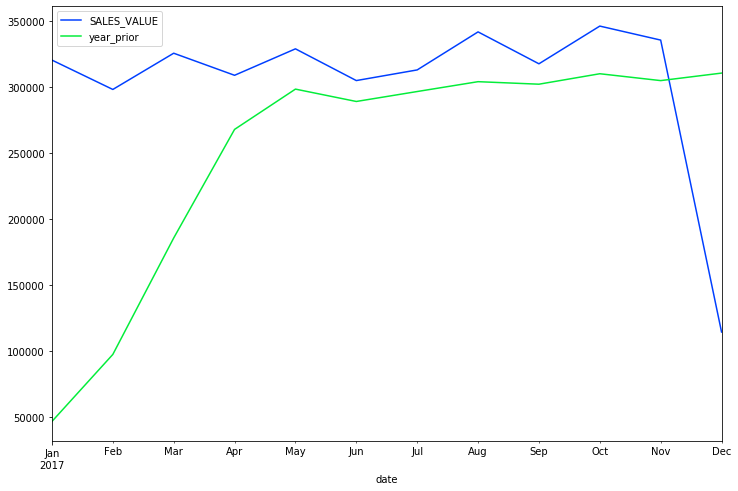

In [35]:
#comparing sales between 2016 and 2017
(transactions
 .set_index("date")
 .loc[:, ["SALES_VALUE"]]
 .resample("M")
 .sum()
 .assign(year_prior = lambda x: x["SALES_VALUE"].shift(12))
 .loc["2017"]
 .plot());

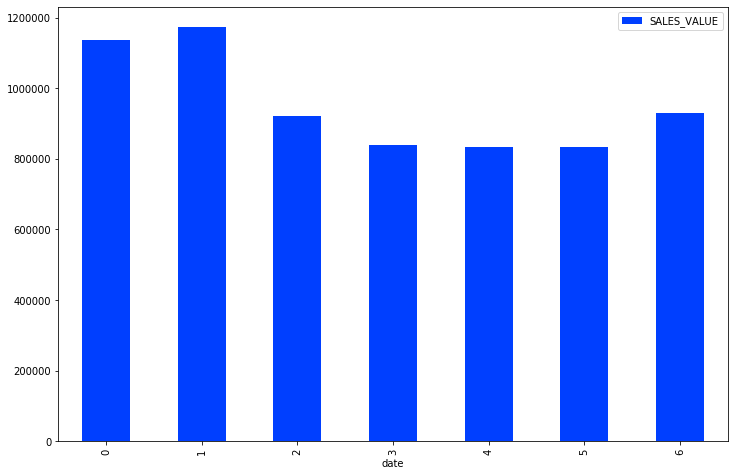

In [37]:
# Group transactions by dayofweek
(transactions
 .groupby(transactions["date"].dt.dayofweek)
 .agg({"SALES_VALUE": "sum"})
 .plot.bar()
);

# DEMOGRAPHICS



In [6]:
dem_cols = ["AGE_DESC", "INCOME_DESC", "household_key", "HH_COMP_DESC"]

dem_dtypes = {"AGE_DESC": "category", "INCOME_DESC": "category", "HH_COMP_DESC":"category"}

demographics = pd.read_csv('../project_data/hh_demographic.csv',
                          usecols=dem_cols,
                          dtype=dem_dtypes
                          )

In [11]:
demographics.head()

,AGE_DESC,INCOME_DESC,HH_COMP_DESC,household_key
0,65+,35-49K,2 Adults No Kids,1
1,45-54,50-74K,2 Adults No Kids,7
2,25-34,25-34K,2 Adults Kids,8
3,25-34,75-99K,2 Adults Kids,13
4,45-54,50-74K,Single Female,16


In [7]:
demographics.info(memory_usage="deep")

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 801 entries, 0 to 800
Data columns (total 4 columns):
AGE_DESC         801 non-null category
INCOME_DESC      801 non-null category
HH_COMP_DESC     801 non-null category
household_key    801 non-null int64
dtypes: category(3), int64(1)
memory usage: 9.9 KB


In [8]:
# Create total sales by household dataframe

household_sales = (transactions
                   .groupby("household_key")
                   .agg({"SALES_VALUE": "sum"})
                  )

household_sales

,SALES_VALUE
household_key,
1,4330.16
2,1954.34
3,2653.21
4,1200.11
5,779.06
...,...
2095,3790.49
2096,1301.65
2097,8823.83


In [9]:
# Join household sales and demographics table on household_key (inner since we're interested in both sets)

household_sales_demo = (household_sales.merge(demographics, 
                             how="inner",
                             left_on='household_key',
                             right_on="household_key",
                             )
                       )

In [15]:
household_sales_demo.info(memory_usage="deep")

<class 'pandas.core.frame.DataFrame'>
Int64Index: 668 entries, 0 to 667
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype   
---  ------         --------------  -----   
 0   household_key  668 non-null    int64   
 1   SALES_VALUE    668 non-null    float64 
 2   AGE_DESC       668 non-null    category
 3   INCOME_DESC    668 non-null    category
 4   HH_COMP_DESC   668 non-null    category
dtypes: category(3), float64(1), int64(1)
memory usage: 19.8 KB


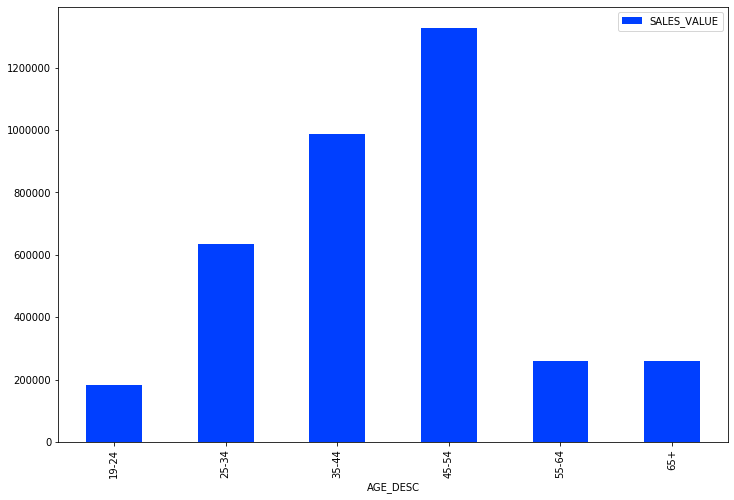

In [43]:
#okay...now calculating sum of sales by age group
(household_sales_demo
.groupby(["AGE_DESC"])
.agg({"SALES_VALUE": "sum"})
.plot.bar()
);

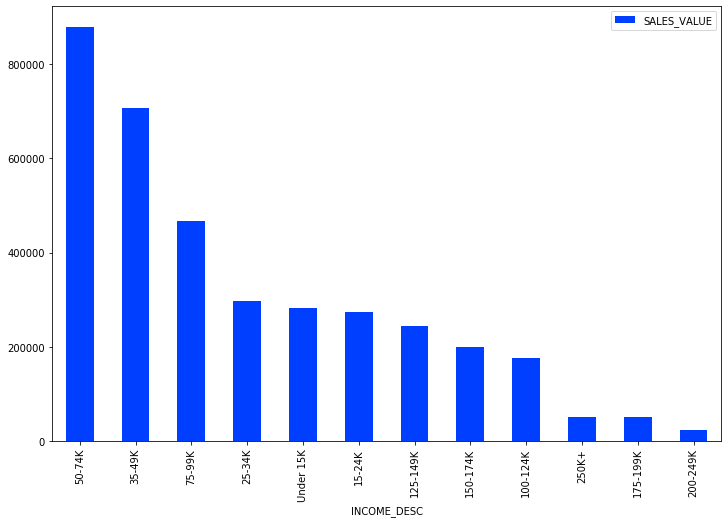

In [44]:
# Calculate sum of sales by income, ordered by magnitude

(household_sales_demo.groupby(["INCOME_DESC"])
.agg({"SALES_VALUE": "sum"})
.sort_values("SALES_VALUE", ascending=False)
.plot.bar())

In [45]:
(household_sales_demo.pivot_table(index="AGE_DESC", 
                 columns="HH_COMP_DESC",
                 values="SALES_VALUE",
                 aggfunc="mean",
                 margins=True)
 .style.background_gradient(cmap="RdYlGn", axis=None)
)

HH_COMP_DESC,1 Adult Kids,2 Adults Kids,2 Adults No Kids,Single Female,Single Male,Unknown,All
AGE_DESC,,,,,,,
19-24,7268.8,5428.94,4020.8,4576.1,3216.83,4911.27,4692.08
25-34,5512.2,5753.97,5638.52,4807.44,4909.52,7356.27,5435.52
35-44,6297.74,6691.77,6260.41,6015.19,4844.19,4227.69,6090.56
45-54,6632.57,6610.48,5839.53,4549.37,4636.64,4844,5534.88
55-64,3064.87,4695.65,5752.41,4816.15,3922.55,7973.75,5168.92
65+,4040.81,5536.87,4614.11,4059.7,3871.56,2879.29,4340.94
All,6032.8,6280.07,5599.86,4895.93,4544.65,4936.13,5468.4


# PRODUCT DEMOGRAPHICS





In [12]:
product_cols = ["PRODUCT_ID", "DEPARTMENT"]

product_dtypes = {"PRODUCT_ID": "Int32", "DEPARTMENT": "category"}

product = pd.read_csv('../project_data/product.csv',
                     usecols=product_cols,
                     dtype=product_dtypes)

In [29]:
product.dtypes

PRODUCT_ID       Int32
DEPARTMENT    category
dtype: object

In [17]:
# Join all three tables together with an inner join
trans_demo_dept = (transactions
                  .merge(demographics, 
                         how="inner",
                         left_on='household_key',
                         right_on="household_key",)
                  .merge(product,
                         how="inner",
                         left_on="PRODUCT_ID",
                         right_on="PRODUCT_ID")
             
             )

In [18]:
trans_demo_dept.info(memory_usage="deep")

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1161575 entries, 0 to 1161574
Data columns (total 10 columns):
household_key    1161575 non-null int64
BASKET_ID        1161575 non-null int64
PRODUCT_ID       1161575 non-null int64
QUANTITY         1161575 non-null Int32
SALES_VALUE      1161575 non-null float64
date             1161575 non-null datetime64[ns]
AGE_DESC         1161575 non-null category
INCOME_DESC      1161575 non-null category
HH_COMP_DESC     1161575 non-null category
DEPARTMENT       1161575 non-null category
dtypes: Int32(1), category(4), datetime64[ns](1), float64(1), int64(3)
memory usage: 63.1 MB


In [19]:
#youngest demographic rank near the top in sales

(trans_demo_dept.pivot_table(index="DEPARTMENT",
                            columns="AGE_DESC",
                            values="SALES_VALUE",
                            aggfunc="sum")
 .style.background_gradient(cmap="RdYlGn", axis=1))

AGE_DESC,19-24,25-34,35-44,45-54,55-64,65+
DEPARTMENT,,,,,,
,0,0,0,0,0,0
AUTOMOTIVE,11.64,21.25,72.58,55.92,nan,16.37
CHEF SHOPPE,81.3,134.16,348.53,418.24,80.86,149.24
CNTRL/STORE SUP,2,0,1,9.95,2,0.1
COSMETICS,698.63,2273.03,4362.02,5187.57,986.26,600.9
COUP/STR & MFG,7.49,48.42,121.2,154.55,40.68,20.49
DAIRY DELI,3.8,3.85,7.39,16.75,3.14,1.94
DELI,4043.3,18181.9,34577.3,44334.2,9850.54,10462.3
DELI/SNACK BAR,nan,nan,6.98,1.56,nan,3.31


# EXPORT



In [16]:
(trans_demo_dept.pivot_table(index="DEPARTMENT",
                            columns="AGE_DESC",
                            values="SALES_VALUE",
                            aggfunc="sum")
 .style.background_gradient(cmap="RdYlGn", axis=1)
 .to_excel("demographic_category_sales.xlsx", sheet_name="sales_pivot")
)